In [1]:
import pandas as pd
df = pd.read_csv("analisis_frontal_hand_svm_pyfeat.csv")

missing_before = df["dominant_emotion_before"].isna().sum()
missing_after = df["dominant_emotion_after"].isna().sum()
print(f"Gagal deteksi before: {missing_before}")
print(f"Gagal deteksi after: {missing_after}")

correct_before = (df["gt"] == df["dominant_emotion_before"]).sum()
correct_after = (df["gt"] == df["dominant_emotion_after"]).sum()

print("\n")
print("Correct before:", correct_before)
print("Correct after:", correct_after)

accuracy_before = (df["gt"] == df["dominant_emotion_before"]).mean() * 100
accuracy_after = (df["gt"] == df["dominant_emotion_after"]).mean() * 100

print("\n")
print(f"Akurasi before: {accuracy_before:.2f}%")
print(f"Akurasi after: {accuracy_after:.2f}%")

accuracy_per_class_before = ((df["gt"] == df["dominant_emotion_before"]).groupby(df["gt"]).mean() * 100)
accuracy_per_class_after = ((df["gt"] == df["dominant_emotion_after"]).groupby(df["gt"]).mean() * 100)

print("\n")
print("Akurasi per emosi (before):")
print(accuracy_per_class_before)

print("\n")
print("Akurasi per emosi (after):")
print(accuracy_per_class_after)


Gagal deteksi before: 15
Gagal deteksi after: 46


Correct before: 467
Correct after: 574


Akurasi before: 30.05%
Akurasi after: 36.94%


Akurasi per emosi (before):
gt
angry       81.531532
disgust      0.450450
fear        69.369369
happy       36.486486
neutral      8.108108
sad         11.261261
surprise     3.153153
dtype: float64


Akurasi per emosi (after):
gt
angry       68.468468
disgust      0.450450
fear        54.054054
happy       82.432432
neutral      8.108108
sad         44.594595
surprise     0.450450
dtype: float64


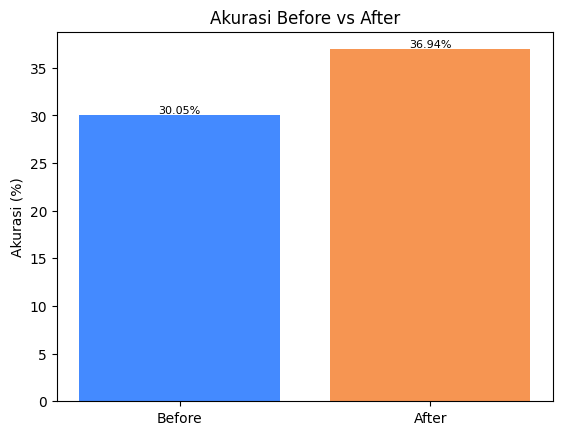

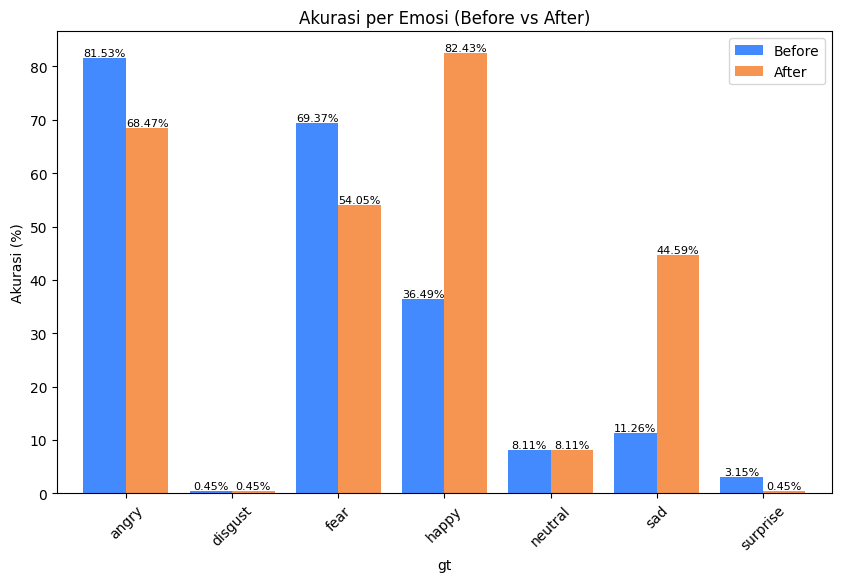

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

sz = (10, 6)
w = 0.8

fig, ax = plt.subplots()
bars = ax.bar(["Before", "After"], [accuracy_before, accuracy_after], color=["#448aff", "#f69552"], width=w)
ax.set_title("Akurasi Before vs After")
ax.set_ylabel("Akurasi (%)")

for p in bars:
    ax.annotate(
        f"{p.get_height():.2f}%",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center", va="bottom", fontsize=8, rotation=0
    )
fig.savefig("fig/svm_hand_akurasi_all.png", dpi=300)
plt.show()

fig, ax = plt.subplots(figsize=sz)
df_accuracy = pd.DataFrame({
    "Before": accuracy_per_class_before,
    "After": accuracy_per_class_after
})
df_accuracy.plot(kind='bar', ax=ax, width=w, color=["#448aff", "#f69552"])  # Custom colors
ax.set_title("Akurasi per Emosi (Before vs After)")
ax.set_ylabel("Akurasi (%)")
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}%",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center", va="bottom", fontsize=8, rotation=0
    )
fig.savefig("fig/svm_hand_akurasi_per_kelas.png", dpi=300)
plt.show()
